In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [2]:
N_components = 0.85

# Pulizia

In [3]:
df = pd.read_csv('rsc/student_data.csv')

print(df.head())
print(df.describe())
df.info()

print(df.columns)
print(df.isnull().sum().sum())

# cerchiamo i duplicati
print(df.duplicated().sum())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
              age        Medu        Fedu  traveltime   studytime    failures  \
count  

# Preprocessing

school: 2 unique values
sex: 2 unique values
address: 2 unique values
famsize: 2 unique values
Pstatus: 2 unique values
Mjob: 5 unique values
Fjob: 5 unique values
reason: 4 unique values
guardian: 3 unique values
schoolsup: 2 unique values
famsup: 2 unique values
paid: 2 unique values
activities: 2 unique values
nursery: 2 unique values
higher: 2 unique values
internet: 2 unique values
romantic: 2 unique values
Numero di componenti principali: 21


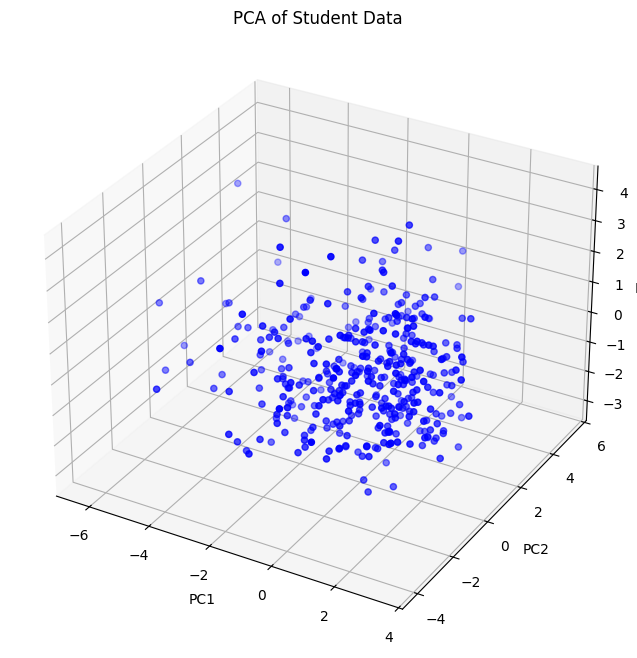

In [4]:
# controlliamo il numero di valori unici per ogni colonna categorica. non ha senso fare il label encoder su colonne con valori tutti uguali o tutti diversi
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

# rimuoviamo le colonne dei voti 
df = df.drop(columns=['G1', 'G2', 'G3'])

# usiamo il label encoder per convertire le colonne categoriche in numeriche
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


# PCA per ridurre la dimensionalità
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA(n_components=N_components)
pca_data = pca.fit_transform(scaled_data)

# numero di componenti principali
print(f"Numero di componenti principali: {pca.n_components_}")

# Visualizzazione dei dati PCA in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c='blue', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA of Student Data')
plt.show()


# K-Means

Silhouette score for 2 clusters: 0.10546083300465255 inertia: 9356.920436256365
Silhouette score for 3 clusters: 0.07238154778423458 inertia: 8907.714027866405
Silhouette score for 4 clusters: 0.0599237269009166 inertia: 8601.841253557672
Silhouette score for 5 clusters: 0.06190367292336011 inertia: 8301.319532363985
Silhouette score for 6 clusters: 0.0516898855841585 inertia: 8026.16893679019
Silhouette score for 7 clusters: 0.05259603937833658 inertia: 7759.62286563103
Silhouette score for 8 clusters: 0.056876004256294896 inertia: 7542.204467404206
Silhouette score for 9 clusters: 0.06039349925917723 inertia: 7329.599111201082
Silhouette score for 10 clusters: 0.05313237413725401 inertia: 7211.645664989996
Silhouette score for 11 clusters: 0.05611906411530959 inertia: 7110.056755131862
Silhouette score for 12 clusters: 0.05748972062322116 inertia: 6999.657917200479
Silhouette score for 13 clusters: 0.05130903775367612 inertia: 6895.488396280312
Silhouette score for 14 clusters: 0.054

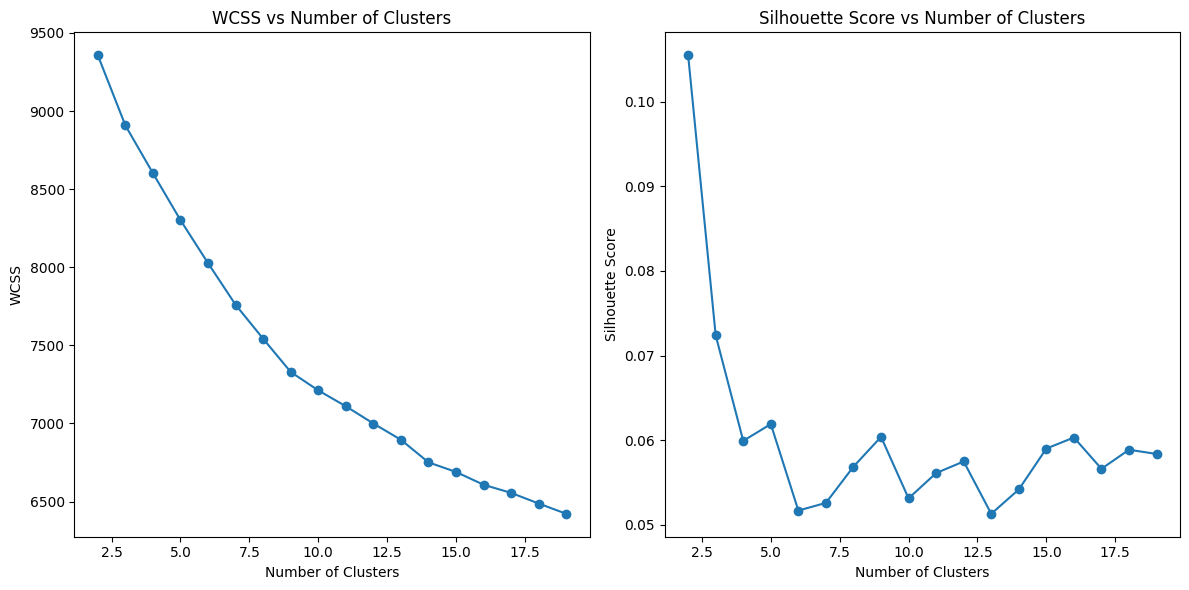

In [ ]:
wcss = [] # lista per memorizzare l'inertia (WCSS) per ogni numero di cluster provato
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    silhouette_avg = silhouette_score(pca_data, kmeans.labels_)
    print(f"Silhouette score for {i} clusters: {silhouette_avg} inertia: {kmeans.inertia_}")
    wcss.append(kmeans.inertia_)

# plotting inetia e silhouette scores affiancati
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 20), wcss, marker='o')
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.subplot(1, 2, 2)
plt.plot(range(2, 20), [silhouette_score(pca_data, KMeans(n_clusters=i, random_state=42).fit(pca_data).labels_) for i in range(2, 20)], marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


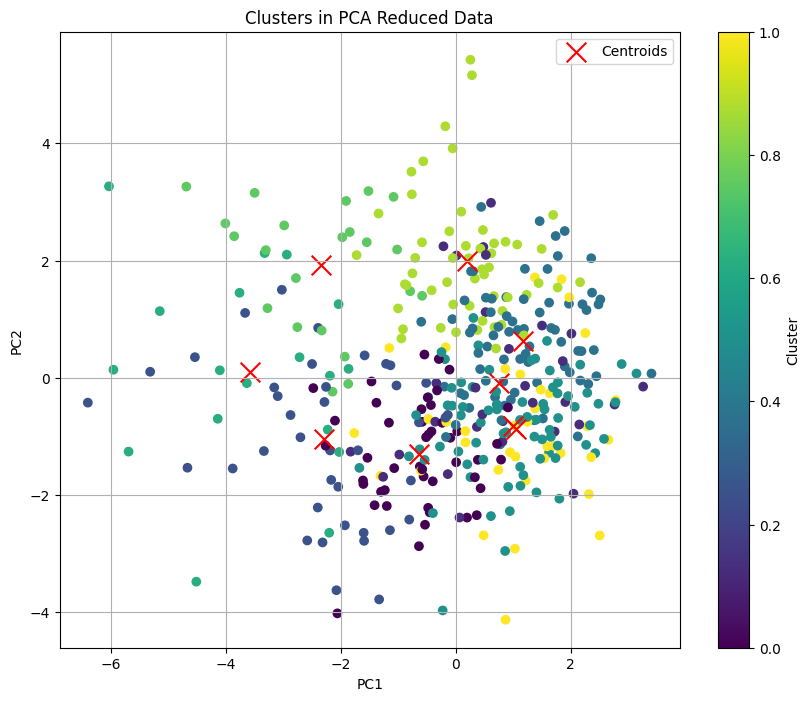

In [8]:
# assegniamo le labels del kmeans al dataframe originale
kmeans = KMeans(n_clusters=9, random_state=42) # Numero di cluster scelto in base al grafico WCSS e silhouette score
kmeans.fit(pca_data)
centroids = kmeans.cluster_centers_
df['Cluster'] = kmeans.labels_

# Visualizzazione dei cluster in 2D
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters in PCA Reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.legend()
plt.grid()
plt.colorbar(label='Cluster')
plt.show()  